<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Andrii/project_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [23]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 152MB/s]


In [3]:
!unzip -q "archive.zip" -d data/

In [24]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [25]:
jan = pd.read_csv(all_file_names[4], parse_dates=['UTC time'])
feb = pd.read_csv(all_file_names[3], parse_dates=['UTC time'])
mar = pd.read_csv(all_file_names[7], parse_dates=['UTC time'])
apr = pd.read_csv(all_file_names[0], parse_dates=['UTC time'])
may = pd.read_csv(all_file_names[8], parse_dates=['UTC time'])
jun = pd.read_csv(all_file_names[6], parse_dates=['UTC time'])
jul = pd.read_csv(all_file_names[5], parse_dates=['UTC time']) 
aug = pd.read_csv(all_file_names[1], parse_dates=['UTC time']) 
sep = pd.read_csv(all_file_names[11], parse_dates=['UTC time']) 
octo = pd.read_csv(all_file_names[10], parse_dates=['UTC time']) 
nov = pd.read_csv(all_file_names[9], parse_dates=['UTC time']) 
dec = pd.read_csv(all_file_names[2], parse_dates=['UTC time'])

In [6]:
list_of_month = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
for tex in list_of_month:

  tex["Week"] = tex["UTC time"].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [7]:


all_week_df = []
for ttt in list_of_month:
  list_of_week = ttt['Week'].tolist()
  list_of_week = list(dict.fromkeys(list_of_week))

  for wk in list_of_week:
    globals()['week%s' % wk] = ttt[ttt['Week'] == wk]
    all_week_df.append(globals()['week%s' % wk])

In [26]:
sensors = pd.read_csv("data/sensor_locations.csv")

In [27]:
sensors.head()

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066
3,147,50.048924,19.962262
4,169,50.048699,20.101569


In [28]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('haversine')

arydist = dist.pairwise(sensors[['latitude','longitude']].to_numpy())*6371000/1000  #3798
datadist = pd.DataFrame(arydist,  columns=sensors.id, index=sensors.id).replace(0, np.nan)


datadist

id,3,140,142,147,169,170,171,172,173,174,176,177,178,179,180,181,182,183,184,185,187,189,192,194,195,196,201,202,203,204,205,208,209,210,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,263,622,713,808,857,895
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,NaN,0.008914,548.572036,56.488484,874.997005,429.780166,173.770805,476.090626,397.896071,289.889868,248.758840,326.342296,408.295639,204.232164,289.329796,90.998812,449.696252,574.373878,267.574089,426.874232,384.043707,208.005527,587.519644,425.888931,230.728098,57.502586,35.359328,388.266989,620.622390,130.035749,375.348921,268.389493,519.304030,360.303471,102.295752,416.677776,349.295578,89.215850,319.625343,238.314572,841.971054,615.903537,159.077952,337.994553,581.432743,252.883307,765.388131,525.367454,221.974023,444.273557,371.506078,102.344821,407.764935,384.047873,222.315819,549.283619
140,0.008914,NaN,548.568055,56.482753,875.002705,429.776014,173.778551,476.085776,397.889774,289.883533,248.762415,326.342275,408.287417,204.231224,289.327217,90.991521,449.698140,574.371109,267.566495,426.871142,384.043078,208.000244,587.513874,425.896435,230.735694,57.509418,35.350710,388.258320,620.630041,130.030966,375.346923,268.394683,519.302998,360.310202,102.286988,416.671250,349.290536,89.222631,319.634221,238.306371,841.964046,615.912138,159.080553,338.003181,581.425381,252.874515,765.380186,525.358541,221.975423,444.264684,371.500211,102.336057,407.756694,384.047244,222.317223,549.279650
142,548.572036,548.568055,NaN,573.398662,1414.554674,119.248160,566.226263,92.373507,212.210598,289.475557,797.113462,294.366934,357.910537,364.292345,784.460932,470.481852,990.563566,86.347952,351.035416,132.582977,242.976022,345.436350,141.770026,939.968712,754.301553,538.114067,525.889420,595.731658,1122.237783,419.446369,203.702739,485.003772,186.340042,892.122829,529.537201,215.379837,208.236783,534.120034,728.607001,398.216174,417.573061,1062.845858,446.745050,811.550182,285.907018,532.346151,459.732244,570.384649,763.193170,489.178271,770.320823,529.528245,360.155682,242.978071,763.549991,1.046374
147,56.488484,56.482753,573.398662,NaN,866.741997,454.163547,227.591187,495.578119,406.760615,299.842442,229.345399,371.308592,395.197412,246.797174,238.446018,102.919649,417.496703,606.109065,265.237243,457.493274,426.447079,228.027889,599.571707,436.714536,245.490537,113.555816,52.340931,344.525952,632.062319,156.603071,411.844625,324.740349,559.576537,363.778987,68.803073,423.329277,368.462612,145.227913,361.861927,228.327335,842.038615,641.643659,212.210597,365.861701,578.546510,213.113516,754.622973,490.382524,189.803997,414.900733,315.030917,68.847234,394.366376,426.451672,190.161071,574.176688
169,874.997005,875.002705,1414.554674,866.741997,NaN,1298.443924,861.594427,1348.908972,1271.768071,1163.870490,639.730963,1145.309956,1251.310908,1050.991374,755.050174,963.132142,519.368772,1424.574766,1131.727207,1285.311194,1207.677777,1082.704304,1462.498719,486.178952,660.575043,877.081347,904.037006,1103.095614,354.897052,1004.113149,1221.714258,977.665901,1340.155791,522.630836,929.243248,1289.376461,1223.218316,880.609136,741.224916,1092.402998,1707.400825,511.416111,971.378684,631.901487,1442.895273,1025.871664,1606.606007,1272.718511,693.464672,1230.788100,894.534136,929.274824,1250.080500,1207.679504,693.134319,1415.149504
170,429.780166,429.776014,119.248160,454.163547,1298.443924,NaN,458.134784,61.852530,127.568918,176.441456,678.131850,206.490112,283.866888,251.609480,667.456325,351.250804,871.399781,167.015994,241.735771,55.831810,172.987905,226.247206,192.292996,827.294275,639.106875,421.378852,406.696951,502.723375,1012.510805,300.369794,116.893388,391.488180,194.708912,776.586513,411.209734,142.396987,92.304576,419.263732,626.489924,287.534573,482.333945,961.569839,335.911594,703.114112,284.790761,424.728380,482.913411,504.990936,643.952491,415.117571,661.362862,411.202320,285.875509,172.992488,644.309253,120.018576
171,173.770805,173.778551,566.2

In [29]:
nearest_sensor = list()
min_dist_tosensor = list()
second_level_ofnearest = list()
third_sensor = list()
for x in datadist:
  nearest_sensor.append(datadist[x].idxmin())
  min_dist_tosensor.append(datadist[x].min())
  second_value = datadist[x].sort_values().values[1]
  second_level_ofnearest.append(datadist[datadist[x] == second_value].index[0])

  third_value = datadist[x].sort_values().values[2]
  third_sensor.append(datadist[datadist[x] == third_value].index[0])

sensors['nearest_sensor'] = np.array(nearest_sensor)
sensors['second_level_ofnearest'] = np.array(second_level_ofnearest)
sensors['third_sensor'] = np.array(third_sensor)


sensors['min_dist_tosensor'] = np.around(np.array(min_dist_tosensor), decimals = 3)
second_value 

85.44031829536677

In [105]:
def list_near_sensor(id_col):
  return datadist[id_col].sort_values().index
list_near_sensor(178)

Int64Index([713, 228, 212, 184, 173, 216, 174, 222, 213, 226, 223, 202, 189,
            172, 170, 192, 204, 181, 622, 211, 185, 179, 142, 205, 895, 225,
            201, 147, 140,   3, 177, 187, 808, 220, 183, 196, 214, 263, 218,
            209, 180, 171, 208, 227, 857, 176, 195, 215, 221, 210, 182, 194,
            219, 203, 169, 178],
           dtype='int64', name='id')

In [46]:
def next_nearest_senson(id_sensor, numline = 0):
  value = datadist[id_sensor].sort_values().values[numline]
  
  return datadist[datadist[id_sensor] == value].index[0]



def search_nearest_column(col_name, col_id, dataf):
  near_sensor = str(next_nearest_senson(col_id))
  for x in dataf.columns[1:]:
    
    if near_sensor in x and col_name in x:
      return dataf[x].name
search_nearest_column(col_name = 'pressure', col_id = 147, dataf = jan)


'201_pressure'

In [ ]:
new_lt = []
for yclumn in year:
  if year[yclumn].isna().bool:
    id = int(yclumn.split("_")[0])
    name_col = yclumn.split("_")[1]
    new_col = search_nearest_column(name_col, id, year)   # Use function above
    rey = pd.concat([year[new_col],year[yclumn]], axis=1)
    rey = rey.interpolate(limit_direction='both', axis=1)
    rey = rey.interpolate(limit_direction='both', axis=0)
    new_lt.append(rey)
    

df = pd.concat(new_lt, axis=1)
df = df.loc[:,~df.columns.duplicated()]
df

In [ ]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

year = year.set_index("UTC time")
# year.isna().sum().sum()


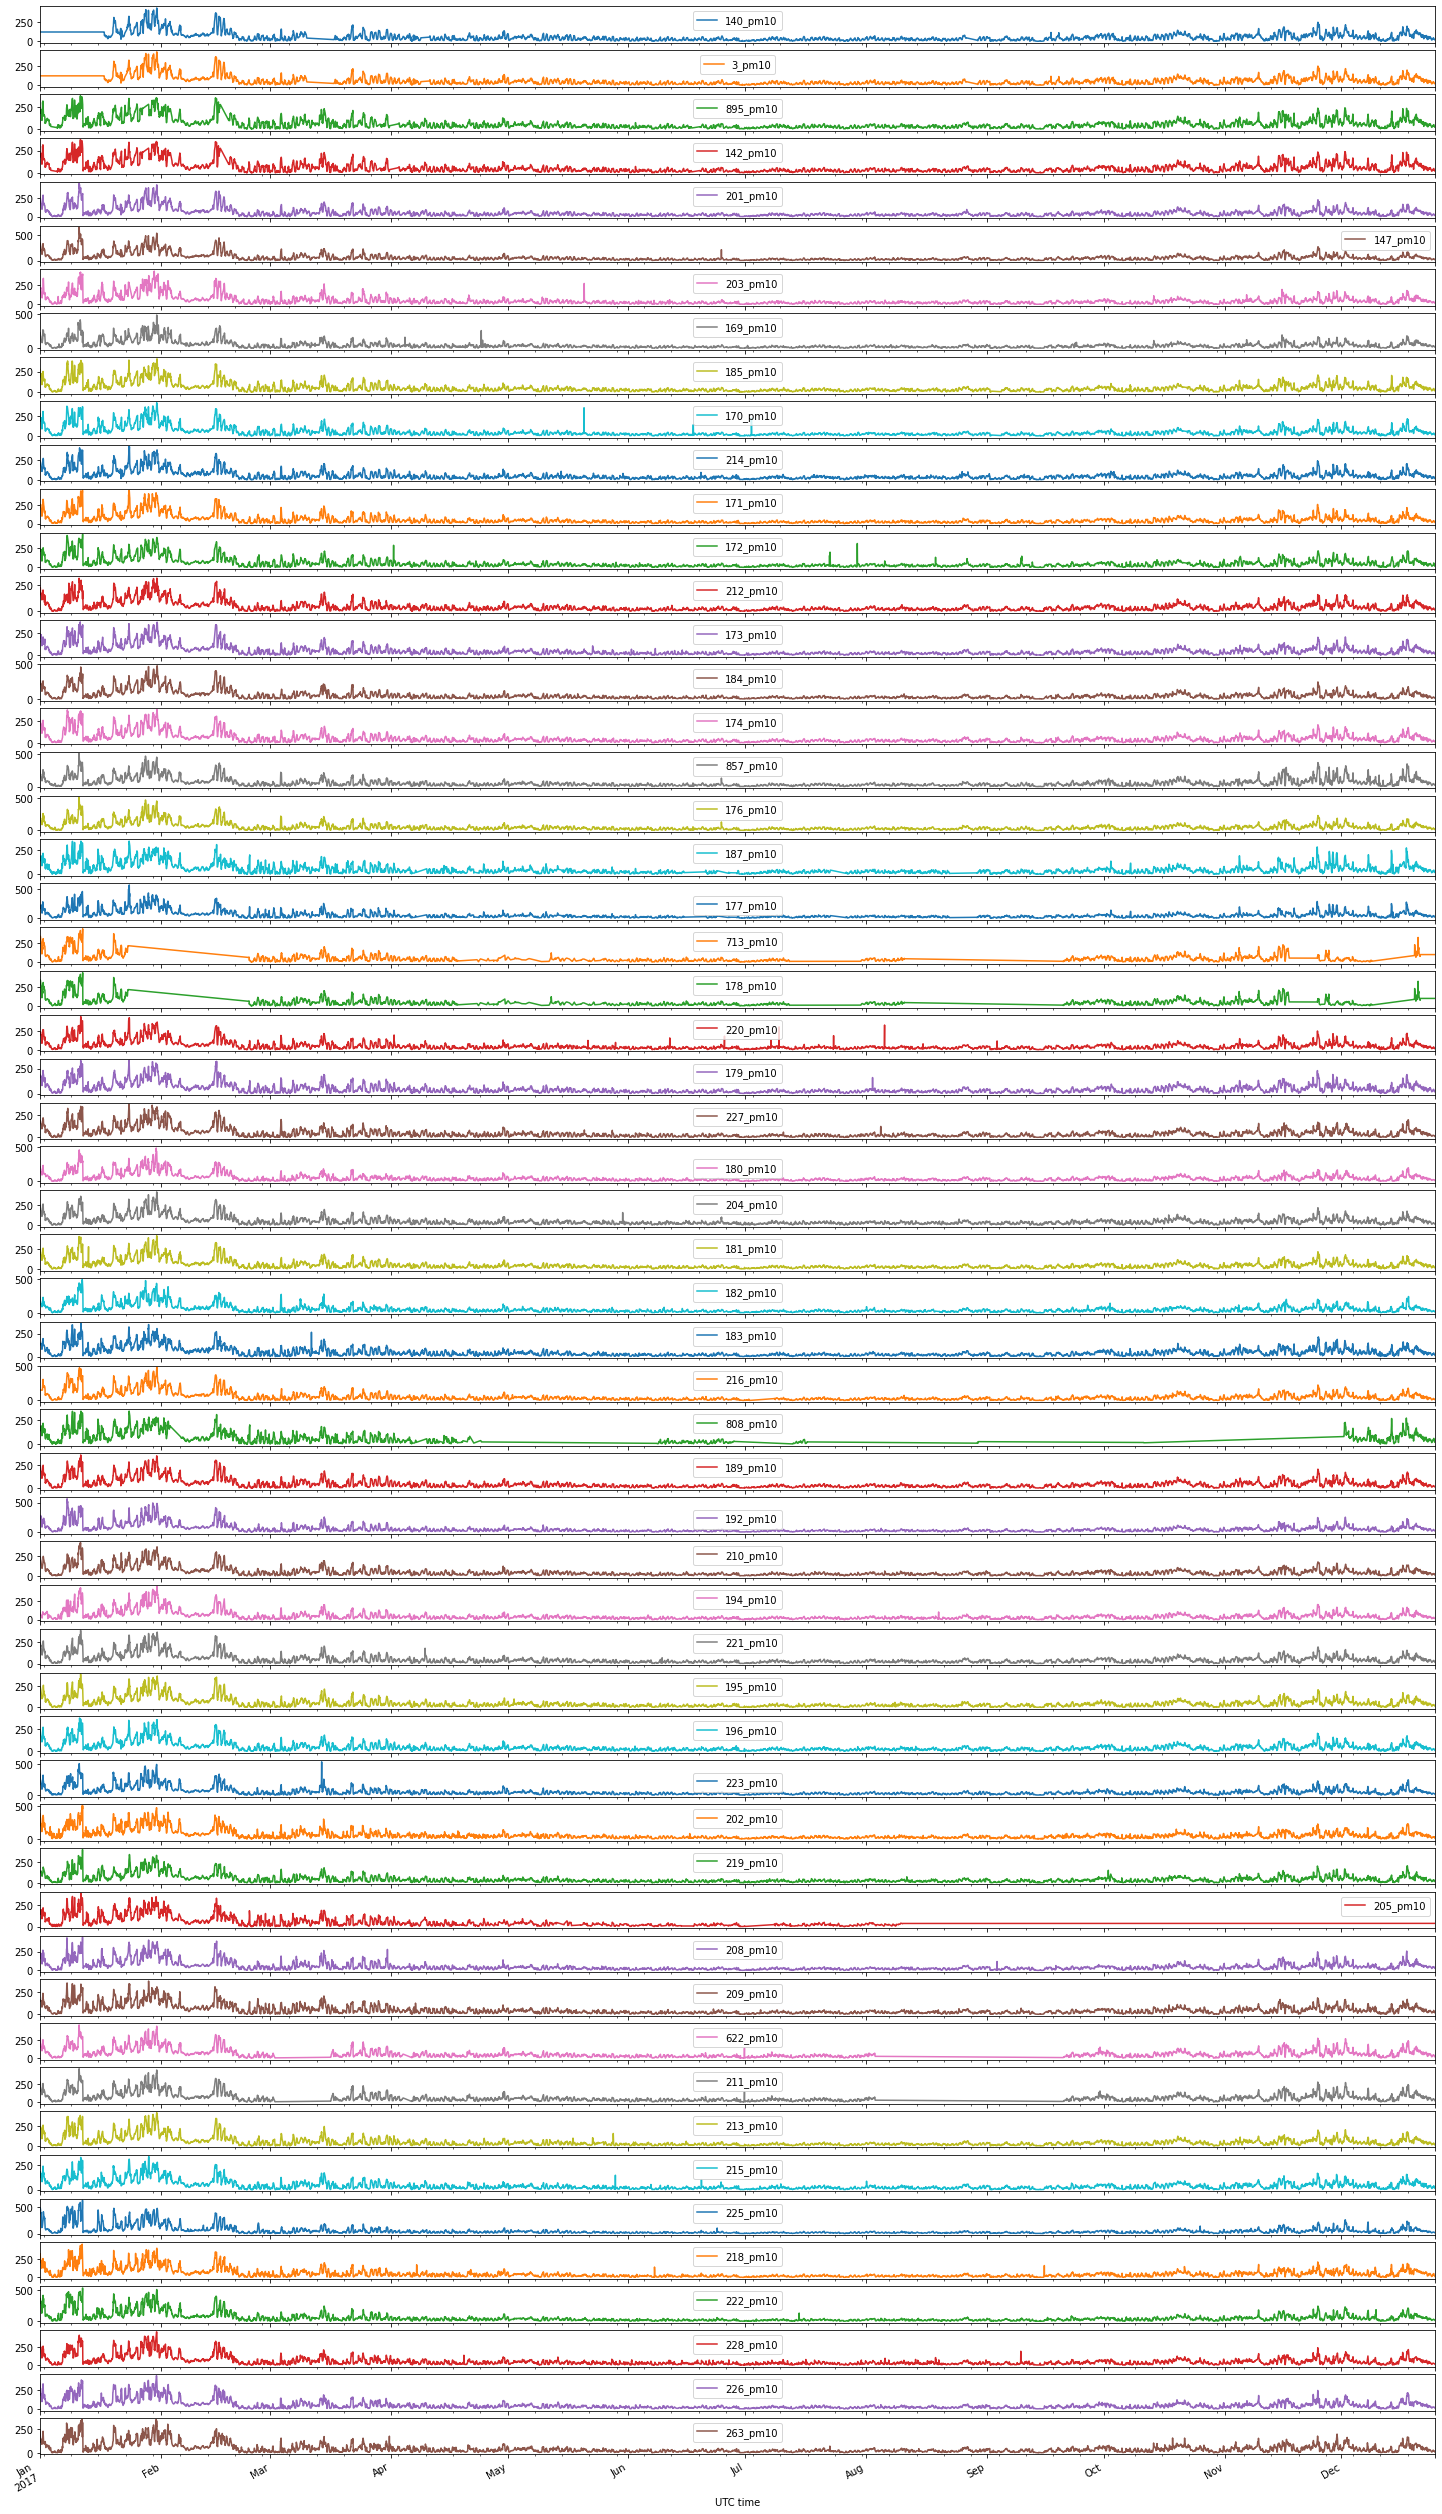

In [96]:
# z = df_pm10.interpolate(limit_direction='both',axis=1)
# columns_pm10 = [ i  for i in df.columns if  i.split("_")[1] == "pm10"]

z.plot(figsize=(25,50), legend=True, subplots=True)
plt.show()

In [118]:
# TEST
# Split DataFrame into  individual

df_temp  = pd.DataFrame()
df_humi  = pd.DataFrame()
df_pres  = pd.DataFrame()
df_pm1  = pd.DataFrame()
df_pm25  = pd.DataFrame()
df_pm10  = pd.DataFrame()

for col in year:
  
  coli = col.split("_")[1]
  if coli == 'temperature':
    df_temp[col] = year[col]
  elif coli == 'humidity':
    df_humi[col] = year[col]
  elif coli == 'pressure':
    df_pres[col] = year[col]
  elif coli == 'pm1':
    df_pm1[col] = year[col]
  elif coli == 'pm25':
    df_pm25[col] = year[col]
  else: 
    df_pm10[col] = year[col]







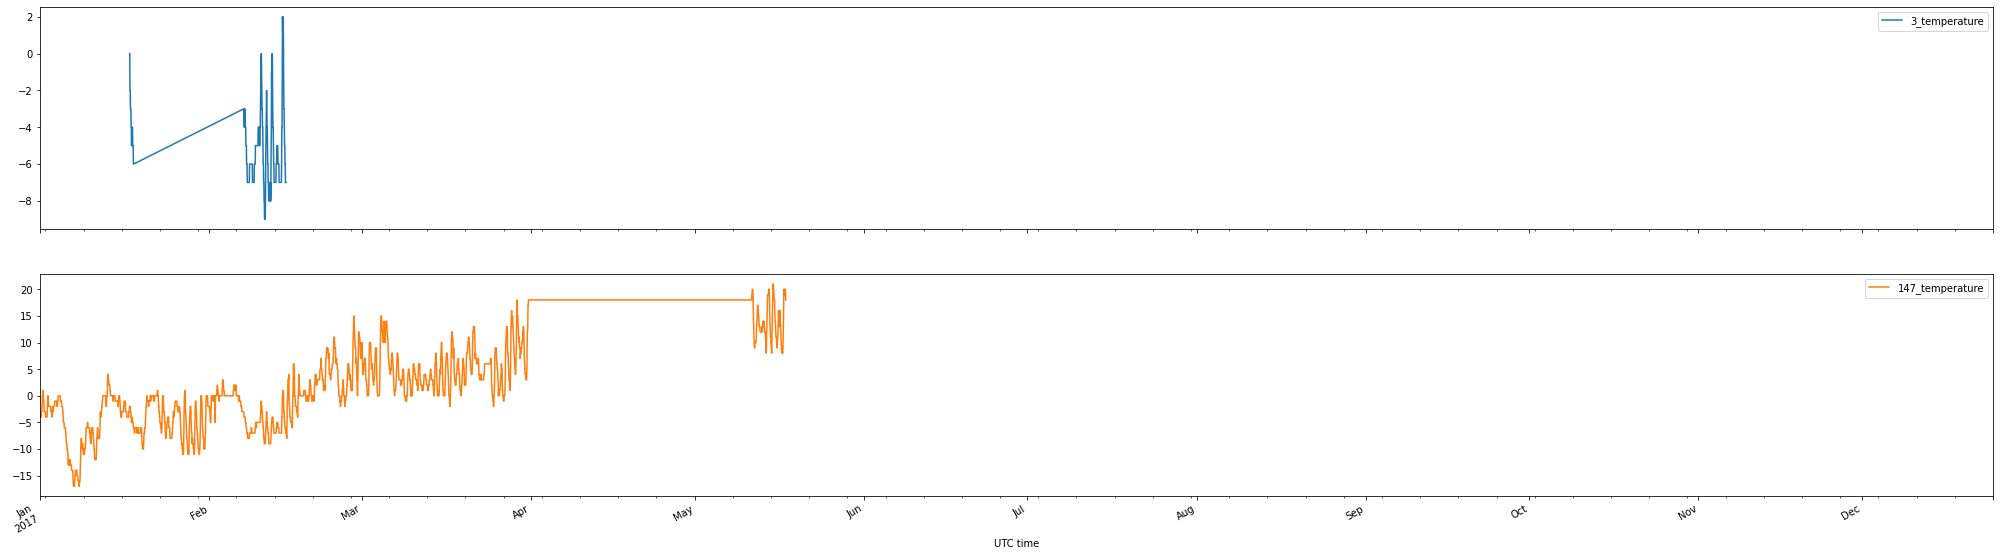

In [110]:
# TEST Interpolation

import scipy
# t = year['UTC time']
x = year['3_temperature']
y = year['147_temperature']

z = pd.concat([x,y,],axis=1)
# z = z.set_index("UTC time")
# z = z.interpolate(limit_direction='both',axis=1)
z = z.interpolate(method = 'slinear' ,limit_direction='both',axis=0)

z.plot(figsize=(35,10), legend=True, subplots=True)
plt.show()

In [ ]:
# TEST Interpolation
import scipy
t = jan['UTC time']
x = jan['3_temperature']
y = jan['147_temperature']
p = jan['201_temperature']
z = pd.concat([t,x,y,p],axis=1)
z = z.set_index("UTC time")
z = z.interpolate(method = 'quadratic', limit_direction='both', axis=1)
# z = z.interpolate(method='time')
z
z.plot(figsize=(35,15), legend=True, subplots=True)
plt.show()

In [ ]:
#  Function return mean from nearest sensor, check all sensor if in second is NaN
# wenk - it's dataFrame in whichone search column and take mean()
def get_mean_from_nearest_sensor(col_name, col_id, wenk):
  
  # numline =+ 1
  # near_sensor = str(sensors[sensors.id == col_id]['nearest_sensor'].values[0])
  near_sensor = list_near_sensor(col_id)
  for x in wenk.columns[1:]:
    for ids in near_sensor:
      print(ids)
      if str(ids) in x and col_name in x:
        # print(f'{near_sensor}  {numline} ')
        # print(f'{wenk[x].mean()} 1')
        hh = wenk[x].mean()
        if np.isnan(hh):
          continue
        else:
          answer =  wenk[x].mean()
          return answer
  
     
    

get_mean_from_nearest_sensor(col_name = 'pressure', col_id = 147, wenk = jan)


In [ ]:
# WEEK LOOP - NaN replaced with mean() in df
pd.options.mode.chained_assignment = None  # "warn" is the default.

for weik in all_week_df:
  for colum in weik.columns[1:-1]:
    id_sensor = int(colum.split('_')[0])
    name_col = (colum.split('_')[1])
    if  weik[colum].isna().sum() >= 1 :

      func = get_mean_from_nearest_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      weik[colum].fillna(func, inplace=True)

year = pd.concat(all_week_df)

In [ ]:
# year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])


In [30]:
year = year.set_index("UTC time")

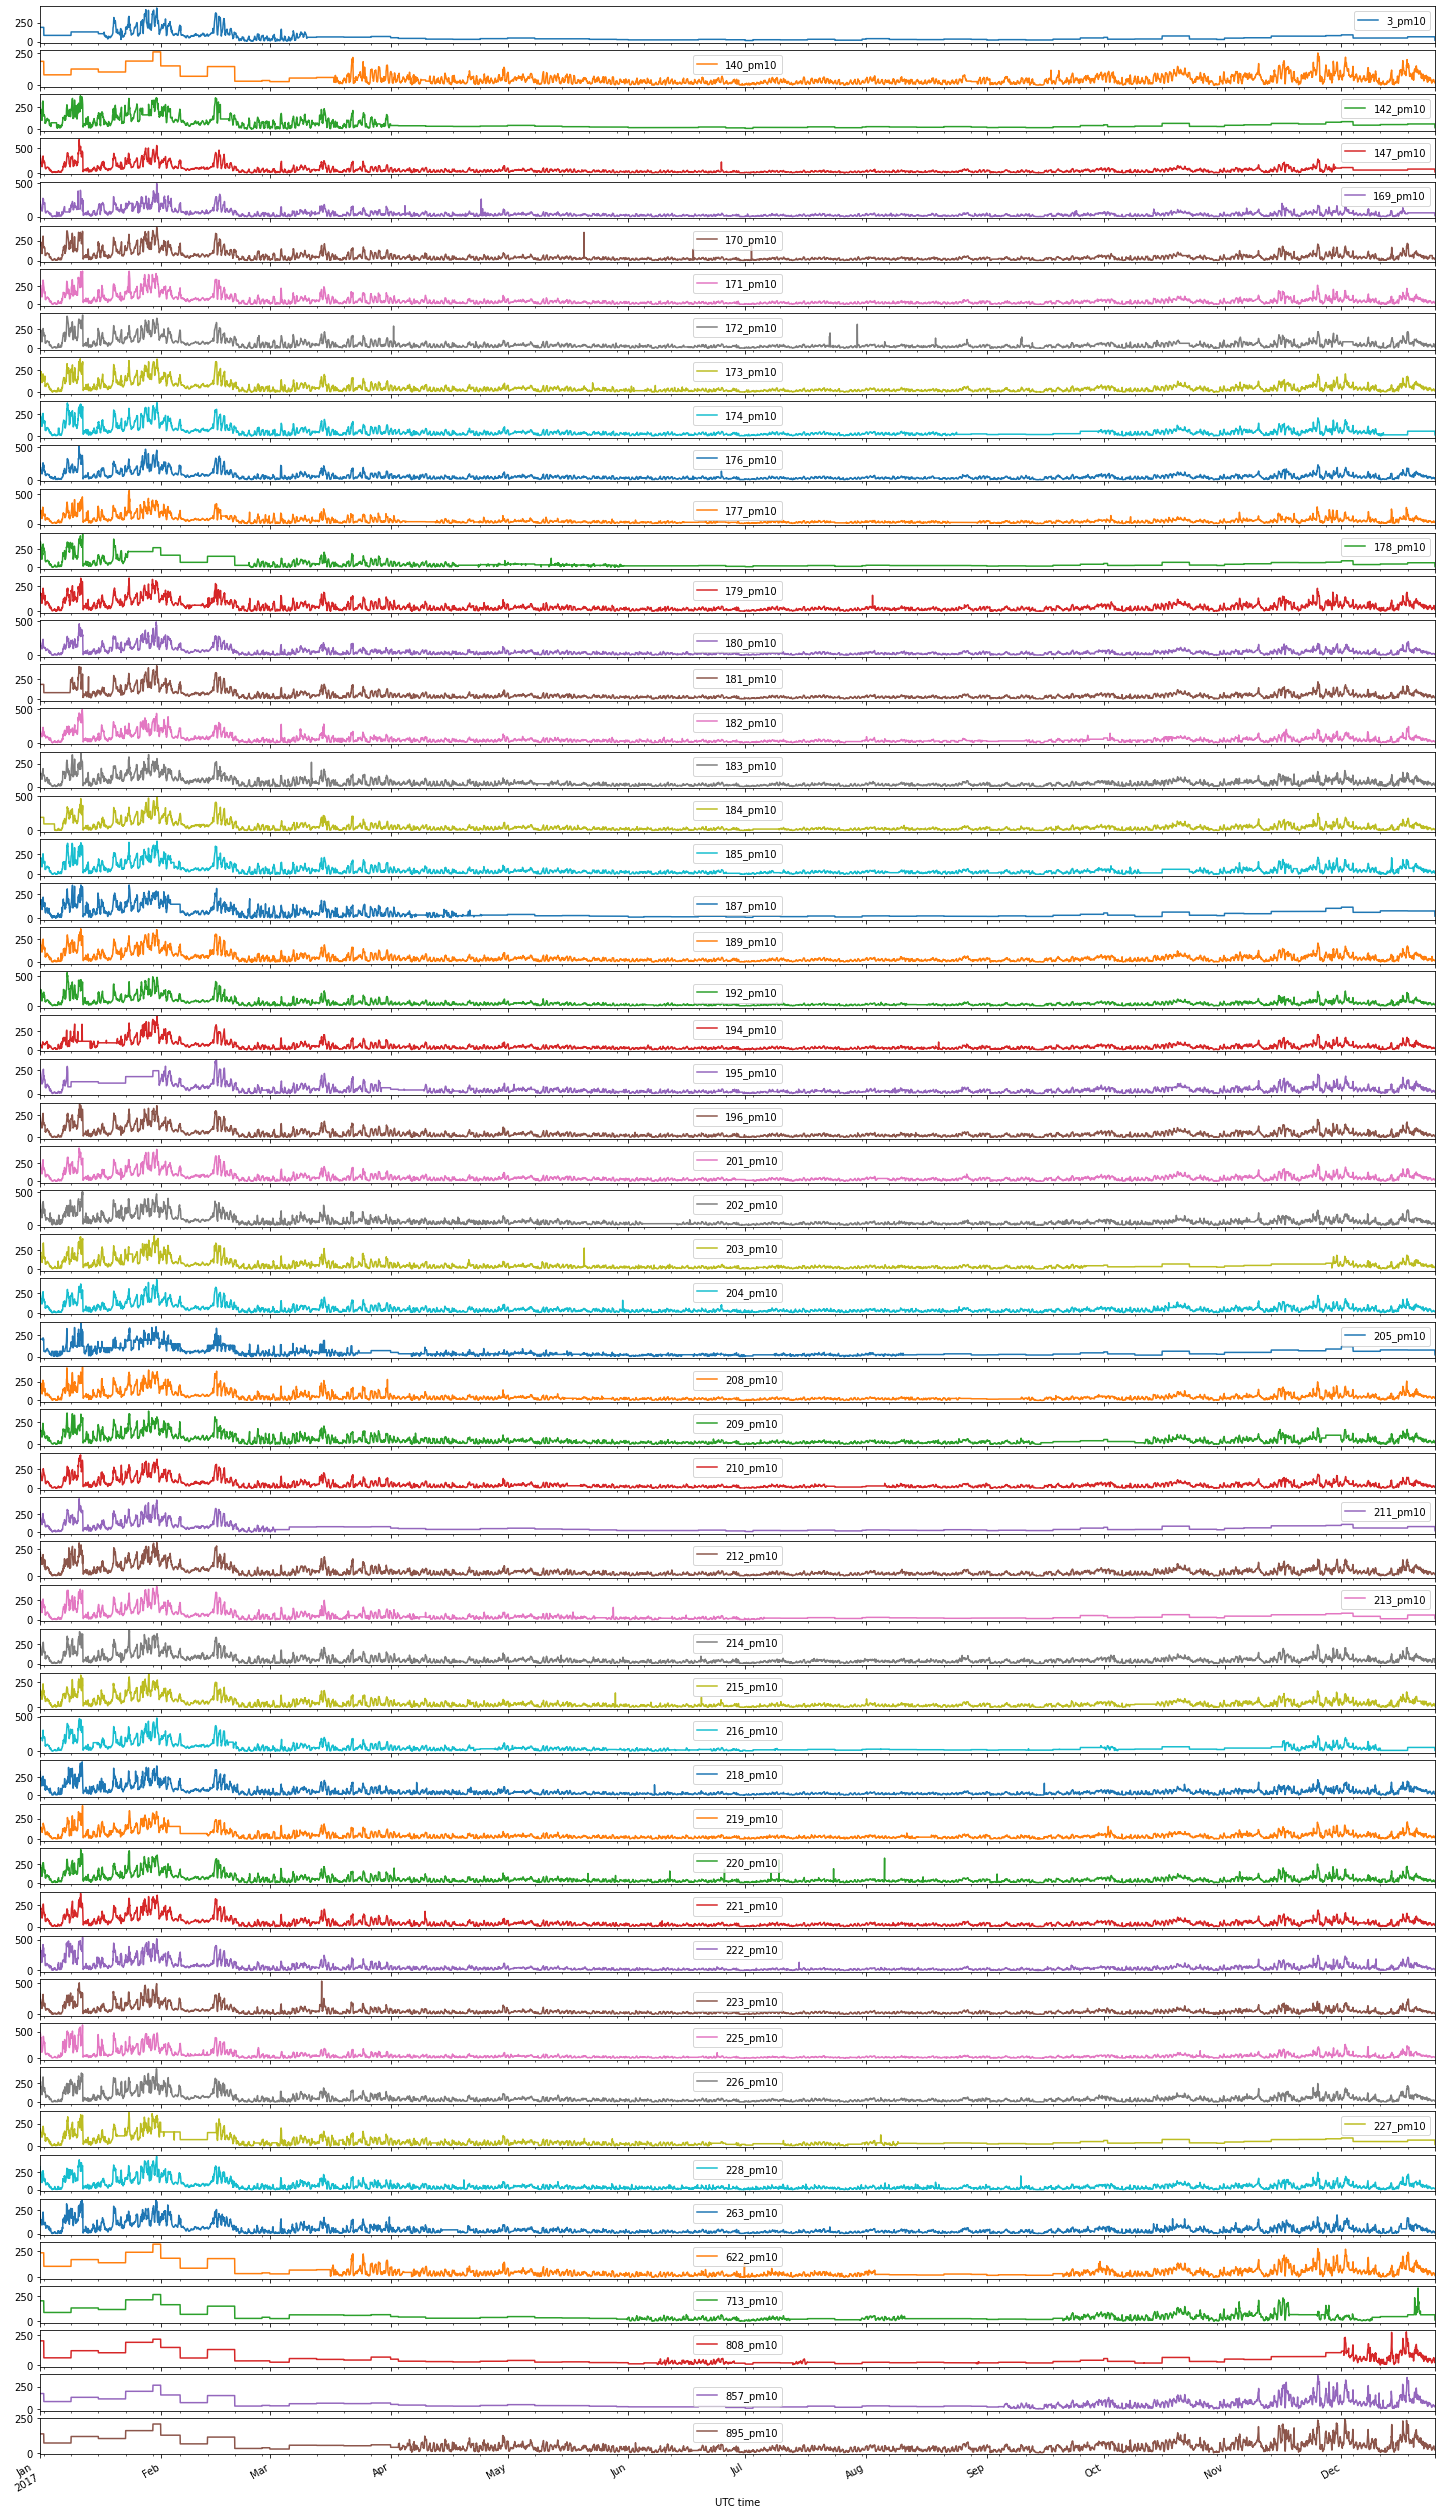

<Figure size 432x288 with 0 Axes>

In [31]:
columns_pm10 = [ i  for i in year.columns[1:-1] if  i.split("_")[1] == "pm10"]

year[columns_pm10].plot(figsize=(25,50), legend=True, subplots=True)
plt.show()
plt.savefig('time-series-pm10.png')

In [ ]:
df2= year.groupby(year.columns.str.split('_').str[0], axis=1)

In [ ]:
for i in df2:
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])
 

In [ ]:
new_df

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
...,...,...,...,...,...,...,...
2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895
2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895
2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895


**OTHER**